In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud


In [ ]:
df = pd.read_csv("/content/yc_companies.csv")

In [ ]:
#mirem les columnes disponibles

print(df.columns)


Index(['id', 'name', 'website', 'all_locations', 'long_description',
       'one_liner', 'team_size', 'industry', 'subindustry', 'launched_at',
       'tags', 'top_company', 'isHiring', 'nonprofit', 'batch', 'status',
       'industries', 'regions', 'stage', 'app_video_public',
       'demo_day_video_public', 'app_answers', 'question_answers'],
      dtype='object')


In [ ]:
df.head()

,id,name,website,all_locations,long_description,one_liner,team_size,industry,subindustry,launched_at,...,nonprofit,batch,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers
0,5,CircuitHub,https://circuithub.com,"London, England, United Kingdom",CircuitHub offers on-demand electronics manufa...,On-Demand Electronics Manufacturing,58.0,Industrials,Industrials -> Manufacturing and Robotics,2011-11-23 10:52:03,...,False,Winter 2012,Active,"['Industrials', 'Manufacturing and Robotics']","['United Kingdom', 'Europe', 'Remote', 'Partly...",Early,False,False,NaN,False
1,6,iCracked,http://icracked.com,"Redwood City, CA, USA",Founded in 2010 and located in the heart of Si...,On-demand smartphone repair in 3 countries and...,51.0,Consumer,Consumer -> Home and Personal,2011-11-23 10:52:12,...,False,Winter 2012,Acquired,"['Consumer', 'Home and Personal']","['United States of America', 'America / Canada']",Growth,False,False,NaN,False
2,7,42Floors,http://42floors.com,"San Francisco, CA, USA; Remote",*Acquired by Knotel in 2018\r\n\r\n42Floors wa...,We make it easy to search for office space.,60.0,Real Estate and Construction,Real Estate and Construction -> Housing and Re...,2011-11-23 10:52:16,...,False,Winter 2012,Acquired,"['Real Estate and Construction', 'Housing and ...","['United States of America', 'America / Canada...",Growth,False,False,NaN,False
3,8,PlanGrid,http://plangrid.com,"San Francisco, CA, USA",PlanGrid is the leader in construction product...,Mobile applications for the construction indus...,355.0,Real Estate and Construction,Real Estate and Construction -> Construction,2011-11-23 10:52:27,...,False,Winter 2012,Acquired,"['Real Estate and Construction', 'Construction']","['United States of America', 'America / Canada']",Growth,False,False,NaN,False
4,9,WireOver,http://wireover.com,"Cambridge, MA, USA",WireOver is a desktop application that leverag...,Really secure file sending for big files.,2.0,B2B,B2B -> Productivity,2011-11-23 10:52:44,...,False,Winter 2012,Inactive,"['B2B', 'Productivity']","['United States of America', 'America / Canada']",Early,False,False,NaN,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5595 non-null   int64  
 1   name                   5595 non-null   object 
 2   website                5561 non-null   object 
 3   all_locations          5109 non-null   object 
 4   long_description       5234 non-null   object 
 5   one_liner              5441 non-null   object 
 6   team_size              5501 non-null   float64
 7   industry               5595 non-null   object 
 8   subindustry            5595 non-null   object 
 9   launched_at            5595 non-null   object 
 10  tags                   5595 non-null   object 
 11  top_company            5594 non-null   object 
 12  isHiring               5595 non-null   bool   
 13  nonprofit              5595 non-null   bool   
 14  batch                  5595 non-null   object 
 15  stat

In [ ]:
print(df.isnull().sum())

id                          0
name                        0
website                    34
all_locations             486
long_description          361
one_liner                 154
team_size                  94
industry                    0
subindustry                 0
launched_at                 0
tags                        0
top_company                 1
isHiring                    0
nonprofit                   0
batch                       0
status                      0
industries                  0
regions                     0
stage                       0
app_video_public            0
demo_day_video_public       0
app_answers              5508
question_answers            0
dtype: int64


In [ ]:
# convertim la columna launched at a data
df['launched_at'] = pd.to_datetime(df['launched_at'])

#Separem anys i mesos, solucionem alguns NAs
df['launch_year'] = df['launched_at'].dt.year
df['launch_month'] = df['launched_at'].dt.month

df['team_size'] = df['team_size'].fillna(1)

df['app_answers'] = df['app_answers'].fillna('False')


In [ ]:
#Extreiem l'any de 'batch'

df['year'] = df['batch'].str.extract(r'(\d{4})').astype(float)

#mirem si l'empresa utilitza o té algun concepte d'IA
df['Es_IA?'] = df['tags'].astype(str).str.contains('Artificial Intelligence|AI', case=False, regex=True)

#Simplifiquem l'estat de les empreses
df['simple_status'] = df['status'].apply(lambda x: 'Active' if 'Active' in str(x) else ('Acquired' if 'Acquired' in str(x) else 'Inactive'))

In [ ]:
df.head()

,id,name,website,all_locations,long_description,one_liner,team_size,industry,subindustry,launched_at,...,stage,app_video_public,demo_day_video_public,app_answers,question_answers,launch_year,launch_month,year,Es_IA?,simple_status
0,5,CircuitHub,https://circuithub.com,"London, England, United Kingdom",CircuitHub offers on-demand electronics manufa...,On-Demand Electronics Manufacturing,58.0,Industrials,Industrials -> Manufacturing and Robotics,2011-11-23 10:52:03,...,Early,False,False,False,False,2011,11,2012.0,False,Active
1,6,iCracked,http://icracked.com,"Redwood City, CA, USA",Founded in 2010 and located in the heart of Si...,On-demand smartphone repair in 3 countries and...,51.0,Consumer,Consumer -> Home and Personal,2011-11-23 10:52:12,...,Growth,False,False,False,False,2011,11,2012.0,False,Acquired
2,7,42Floors,http://42floors.com,"San Francisco, CA, USA; Remote",*Acquired by Knotel in 2018\r\n\r\n42Floors wa...,We make it easy to search for office space.,60.0,Real Estate and Construction,Real Estate and Construction -> Housing and Re...,2011-11-23 10:52:16,...,Growth,False,False,False,False,2011,11,2012.0,False,Acquired
3,8,PlanGrid,http://plangrid.com,"San Francisco, CA, USA",PlanGrid is the leader in construction product...,Mobile applications for the construction indus...,355.0,Real Estate and Construction,Real Estate and Construction -> Construction,2011-11-23 10:52:27,...,Growth,False,False,False,False,2011,11,2012.0,False,Acquired
4,9,WireOver,http://wireover.com,"Cambridge, MA, USA",WireOver is a desktop application that leverag...,Really secure file sending for big files.,2.0,B2B,B2B -> Productivity,2011-11-23 10:52:44,...,Early,False,False,False,False,2011,11,2012.0,False,Inactive


In [ ]:
# Agrupem per any i indústria
industry_trend = df.groupby(['year', 'industry']).size().reset_index(name='count')

#creem un gràfic de arees apilades
fig1 = px.area(industry_trend,
              x="year",
              y="count",
              color="industry",
              groupnorm='percent',
              title="L'Evolució de les Indústries a YC Combinator(%)",
              labels={'count': 'Percentatge', 'year': 'Any'})

fig1.update_layout(template="plotly_white")
fig1.show()

In [ ]:
#agrupem empreses d'IA
IA = df.groupby(['year', 'Es_IA?']).size().reset_index(name='count')

fig2 = px.bar(IA,
              x="year",
              y="count",
              color="Es_IA?",
              title="El boom de la Intel·ligència Artificial",
              labels={'Es_ai?': 'És empresa d\'IA?', 'count': 'Nombre d\'empreses'},
              color_discrete_map={True: '#00CC96', False: '#636EFA'})
fig2.update_layout(template="plotly_white")
fig2.show()

In [ ]:

#netejem els caràcters extranys de 'regions'
df['clean_region'] = df['regions'].astype(str).str.replace(r"[\[\]']", "", regex=True).str.split(',').str[0]

fig3 = px.sunburst(df,
                   path=['clean_region', 'industry'],
                   values='team_size',
                   title="Països o industries?",
                   color='clean_region')

fig3.show()

In [ ]:
import plotly.express as px

def get_country(location_str):
    if pd.isna(location_str): return None
    country = location_str.split(',')[-1].strip()

    if "USA" in country or "United States" in country:
        return "United States of America"
    if "United Kingdom" in country or "UK" in country:
        return "United Kingdom"

    return country

df['Country'] = df['all_locations'].apply(get_country)

# 3. Agrupem
map_data = df.groupby('Country').size().reset_index(name='count')
map_data = map_data[~map_data['Country'].isin(['Remote', 'Unspecified'])]

fig_map = px.choropleth(map_data,
                    locations='Country',
                    locationmode='country names',
                    color='count',
                    hover_name='Country',

                    color_continuous_scale='Plasma',
                    range_color=[0, 150],

                    title='Distribució empreses invertides per YC',
                    projection='natural earth')

fig_map.update_layout(template="plotly_white")
fig_map.show()

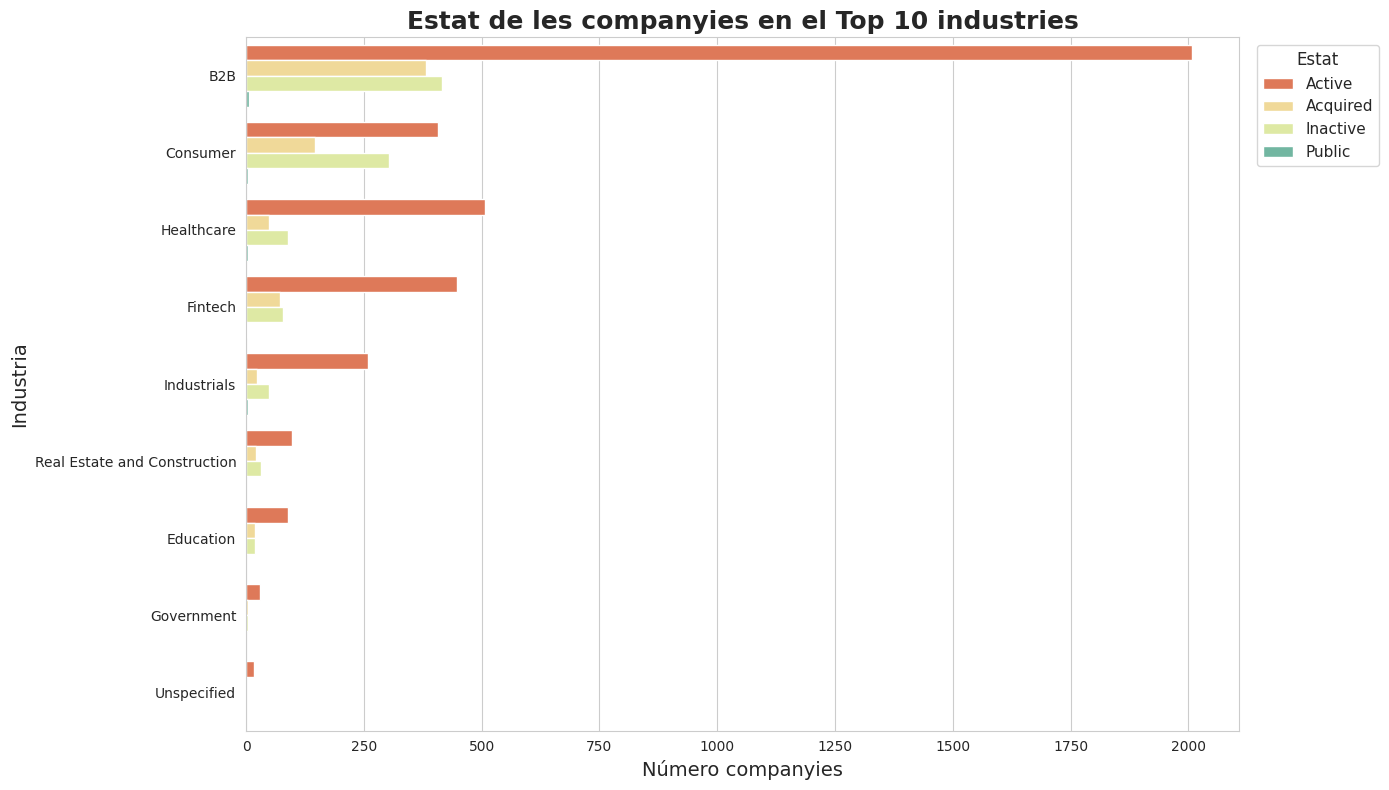

In [ ]:
top_10_industries = df['industry'].value_counts().nlargest(10).index
df_top_industries = df[df['industry'].isin(top_10_industries)]

industry_order = (
    df_top_industries
    .groupby('industry')
    .size()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

sns.countplot(
    y='industry',
    hue='status',
    data=df_top_industries,
    order=industry_order,
    palette='Spectral'
)

plt.title('Estat de les companyies en el Top 10 industries', fontsize=18, weight='bold')
plt.xlabel('Número companyies', fontsize=14)
plt.ylabel('Industria', fontsize=14)
plt.legend(title='Estat', fontsize=11, title_fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


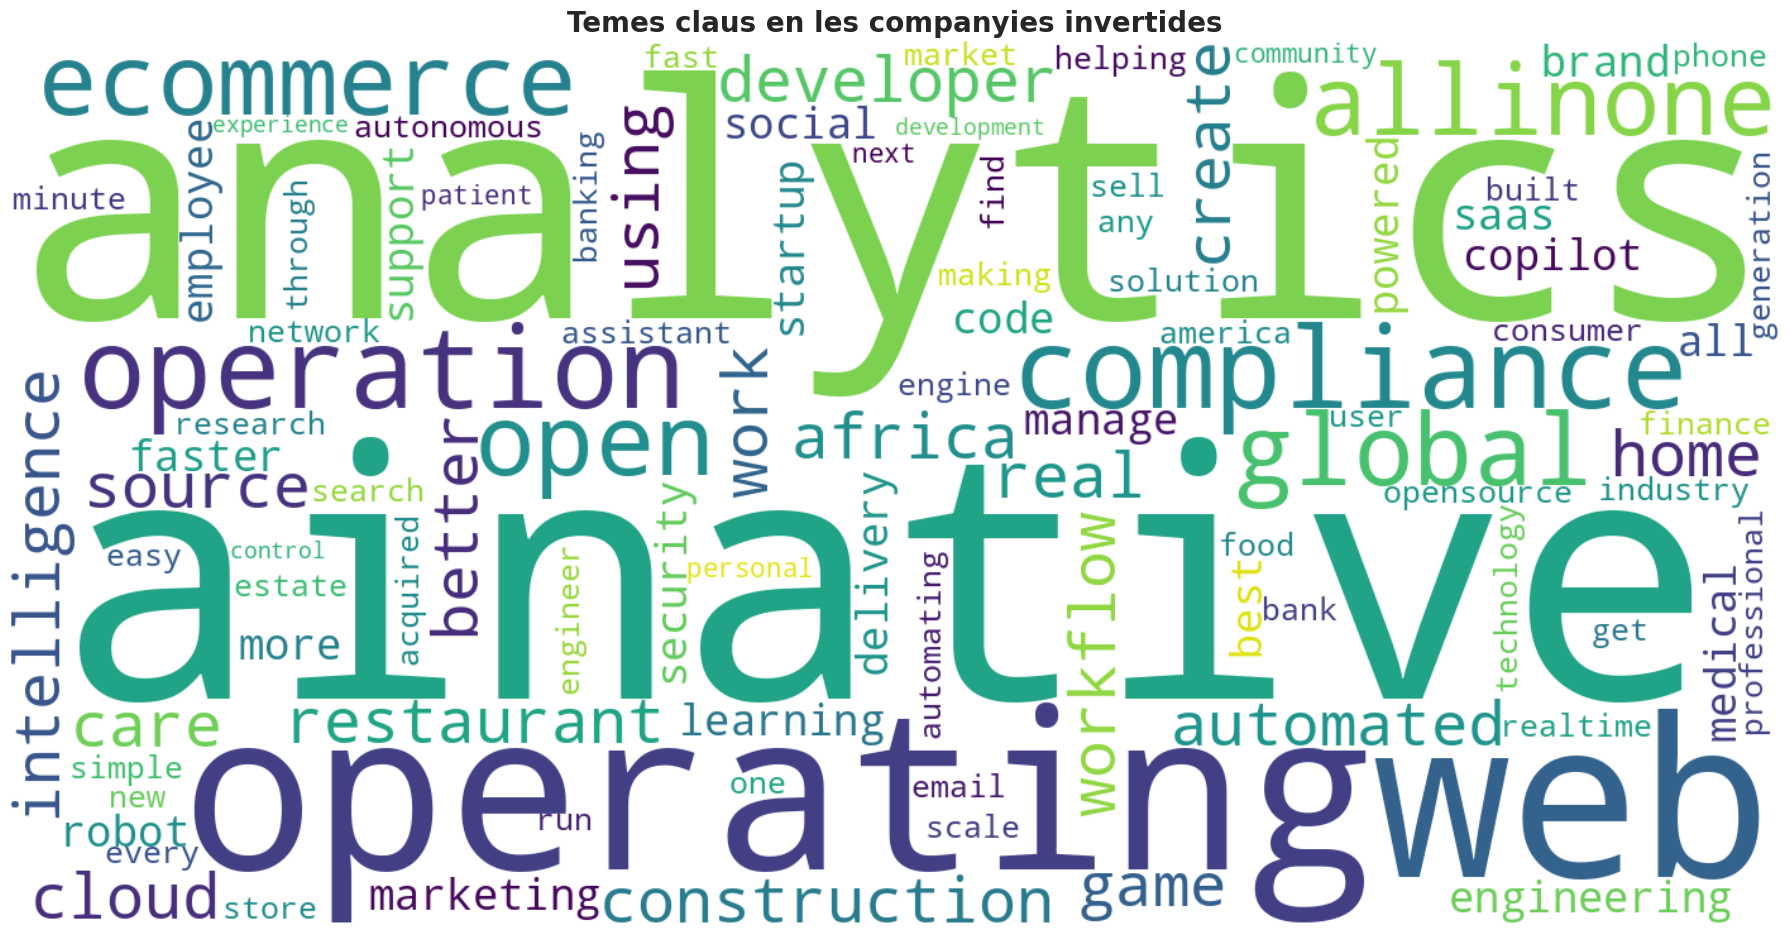

In [ ]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if len(w) > 2]
    return ' '.join(tokens)

df['one_liner_cleaned'] = df['one_liner'].map(preprocess_text)
corpus = [t for t in df['one_liner_cleaned'] if isinstance(t, str) and t.strip()]

all_tokens = ' '.join(corpus).split()
word_freq = Counter(all_tokens)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tfidf_scores = np.asarray(X.mean(axis=0)).flatten()
terms = vectorizer.get_feature_names_out()
tfidf_dict = dict(zip(terms, tfidf_scores))

freq_threshold = np.percentile(list(word_freq.values()), 99)
tfidf_threshold = np.percentile(list(tfidf_scores), 20)

filtered_tokens = {
    word: tfidf_dict[word]
    for word in tfidf_dict
    if word_freq[word] < freq_threshold and tfidf_dict[word] > tfidf_threshold
}

wordcloud = WordCloud(
    width=1400,
    height=700,
    background_color='white',
    colormap='viridis',
    max_words=100,
    prefer_horizontal=0.9
).generate_from_frequencies(filtered_tokens)

plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Temes claus en les companyies invertides', fontsize=20, weight='bold')
plt.tight_layout()
plt.show()